In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('flights.csv')
df.head()

,flight_id,flight_no,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,sum_amount,duration_in_minutes
0,136119,PG0252,AAQ,SVO,733,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,1653000.0,101.0
1,136120,PG0252,AAQ,SVO,733,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,1605400.0,99.0
2,136122,PG0252,AAQ,SVO,733,2017-01-08T10:08:00Z,2017-01-08T11:48:00Z,1431000.0,100.0
3,136130,PG0252,AAQ,SVO,733,2017-02-13T10:07:00Z,2017-02-13T11:46:00Z,1556600.0,99.0
4,136131,PG0252,AAQ,SVO,733,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,1812800.0,99.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            118 non-null    int64  
 1   flight_no            118 non-null    object 
 2   departure_airport    118 non-null    object 
 3   arrival_airport      118 non-null    object 
 4   aircraft_code        118 non-null    object 
 5   actual_departure     118 non-null    object 
 6   actual_arrival       118 non-null    object 
 7   sum_amount           118 non-null    float64
 8   duration_in_minutes  118 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 8.4+ KB


In [70]:
# Добавим часовой расход топлива для каждой модели (кг)
keys = ['733', 'SU9']
values = [2600, 3100]
d = dict(zip(keys, values))
df['fuel'] = df['aircraft_code'].replace(to_replace=d)
df.head()

,flight_id,flight_no,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,sum_amount,duration_in_minutes,fuel
0,136119,PG0252,AAQ,SVO,733,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,1653000.0,101.0,2600
1,136120,PG0252,AAQ,SVO,733,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,1605400.0,99.0,2600
2,136122,PG0252,AAQ,SVO,733,2017-01-08T10:08:00Z,2017-01-08T11:48:00Z,1431000.0,100.0,2600
3,136130,PG0252,AAQ,SVO,733,2017-02-13T10:07:00Z,2017-02-13T11:46:00Z,1556600.0,99.0,2600
4,136131,PG0252,AAQ,SVO,733,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,1812800.0,99.0,2600


In [71]:
price = 40  # стоимость в рублях одного кг топлива

pilot1 = 2780  # стоимость часа работы первого пилота
pilot2 = 1670  # стоимость часа работы второго пилота
team = 4000  # стоимость часа работы 4 бортпроводников
tech = 20000  # расходы на обслуживание самолета и его двигателей на час полета
insurance = 2000  # стоимость страховки на час полёта

air = 79000  # сборы аэропорта Анапы
taxes = 1/3  # треть от стоимости билета составляют налоги
plane = 100000  # затраты на покупку или лизинг самолёта в пересчете на один полет
# другие расходы (содержание ангаров, зарплаты другим сотрудникам и т.д.)
other = 100000

In [72]:
# Рассчитаем прибыль
df['profit'] = df.sum_amount - 40*df.fuel*df.duration_in_minutes/60 - \
    (pilot1+pilot2+team+tech+insurance) * \
    df.duration_in_minutes/60 - air-taxes-plane-other
df.head()

,flight_id,flight_no,departure_airport,arrival_airport,aircraft_code,actual_departure,actual_arrival,sum_amount,duration_in_minutes,fuel,profit
0,136119,PG0252,AAQ,SVO,733,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,1653000.0,101.0,2600,1.147676e+06
1,136120,PG0252,AAQ,SVO,733,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,1605400.0,99.0,2600,1.104557e+06
2,136122,PG0252,AAQ,SVO,733,2017-01-08T10:08:00Z,2017-01-08T11:48:00Z,1431000.0,100.0,2600,9.279163e+05
3,136130,PG0252,AAQ,SVO,733,2017-02-13T10:07:00Z,2017-02-13T11:46:00Z,1556600.0,99.0,2600,1.055757e+06
4,136131,PG0252,AAQ,SVO,733,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,1812800.0,99.0,2600,1.311957e+06


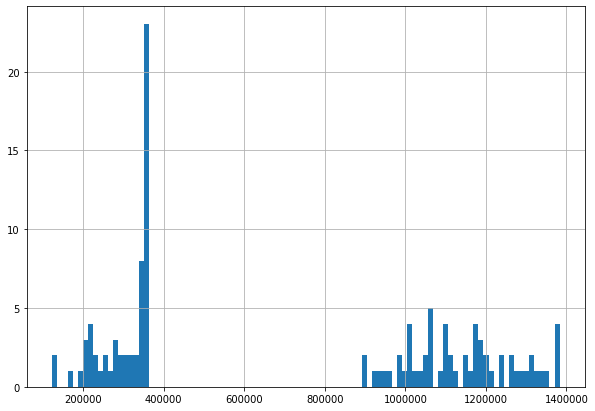

In [73]:
plt.rcParams['figure.figsize'] = (10, 7)
df['profit'].hist(bins=100)

Как мы видим, есть группа рейсов, чья прибыль меньше 400000. Далее будем рассматривать именно эти рейсы.

In [74]:
df1 = df.loc[df.profit <= 400000]
pd.DataFrame(df1.arrival_airport.value_counts())  # Белгород

,arrival_airport
EGO,59


In [75]:
# все неприбыльные рейсы имеют один и тот же номер
pd.DataFrame(df1.flight_no.value_counts())

,flight_no
PG0480,59


In [76]:
pd.DataFrame(df1.aircraft_code.value_counts())  # у него больше расход топлива

,aircraft_code
SU9,59


In [77]:
def rev(row):
    # посмотрим, все ли зимние месяцы неприбыльные
    dt = datetime.strptime(row['actual_arrival'], '%Y-%m-%dT%H:%M:%SZ')
    return dt.month


df1['month'] = df1.apply(lambda row: rev(row), axis=1)
pd.DataFrame(df1.month.value_counts())

C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,month
1,31
2,28


Как можно видеть, декабрь не является неприбыльным

In [78]:
# посмотрим на длительность неприбыльных полётов
pd.DataFrame(df1.duration_in_minutes.value_counts())

,duration_in_minutes
50.0,34
51.0,15
49.0,10


In [79]:
def rev2(row):  # посмотрим на распределение по дням недели
    dt = datetime.strptime(row['actual_arrival'], '%Y-%m-%dT%H:%M:%SZ')
    return dt.weekday()


df1['weekday'] = df1.apply(lambda row: rev2(row), axis=1)
pd.DataFrame(df1.weekday.value_counts())

C:\Users\bella\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,weekday
6,9
1,9
0,9
5,8
4,8
3,8
2,8


Таким образом, самыми неприбыльными оказались рейсы с номером PG0480 в Белгород в январе и феврале. Это может быть из-за:   
1. Самолёта модели Sukhoi Superjet-100, так как он потребляет больше топлива, чем Boeing 737-300   
2. Короткого времени полёта, так как не привязанные ко времени затраты являются одинаковыми для всех полётов, а цена на билет длительных перелётов выше

А вот день недели никак не влияет на прибыльность полёта